# Convolution

## Intuitive Understanding

Convolution is a fundamental operation in signal processing and image processing. It combines two signals to produce a third signal that represents how the shape of one signal is modified by the other. Intuitively, convolution can be thought of as a way of "blending" one function with another.

## Mathematical Formulation

For continuous-time signals $ f(t) $ and $ g(t) $, convolution is defined as:

$$ (f * g)(t) = \int_{-\infty}^{\infty} f(\tau) g(t - \tau) \, d\tau $$

For discrete-time signals $ f[n] $ and $ g[n] $, convolution is given by:

$$ (f * g)[n] = \sum_{k=-\infty}^{\infty} f[k] g[n - k] $$

### *Example 1*: Continuous Convolution

#### Step-by-Step

Consider the continuous functions:

$$ f(t) = \begin{cases} 
1 & \text{for } 0 \leq t \leq 1 \\
0 & \text{otherwise} 
\end{cases} $$

$$ g(t) = \begin{cases} 
1 & \text{for } 0 \leq t \leq 1 \\
0 & \text{otherwise} 
\end{cases} $$

The convolution $ (f * g)(t) $ is computed as follows:

1. Write down the definition:

$$ (f * g)(t) = \int_{-\infty}^{\infty} f(\tau) g(t - \tau) \, d\tau $$

2. Substitute the functions $ f(\tau) $ and $ g(t - \tau) $:

$$ (f * g)(t) = \int_{0}^{1} 1 \cdot g(t - \tau) \, d\tau $$

3. Determine the limits of integration based on $ g(t - \tau) $:

$$ (f * g)(t) = \int_{\max(0, t-1)}^{\min(1, t)} 1 \, d\tau $$

4. Evaluate the integral for different ranges of $ t $:

$$ (f * g)(t) = \begin{cases} 
0 & \text{if } t < 0 \\
t & \text{if } 0 \leq t < 1 \\
2 - t & \text{if } 1 \leq t < 2 \\
0 & \text{if } t \geq 2 
\end{cases} $$

### Graphical Illustration

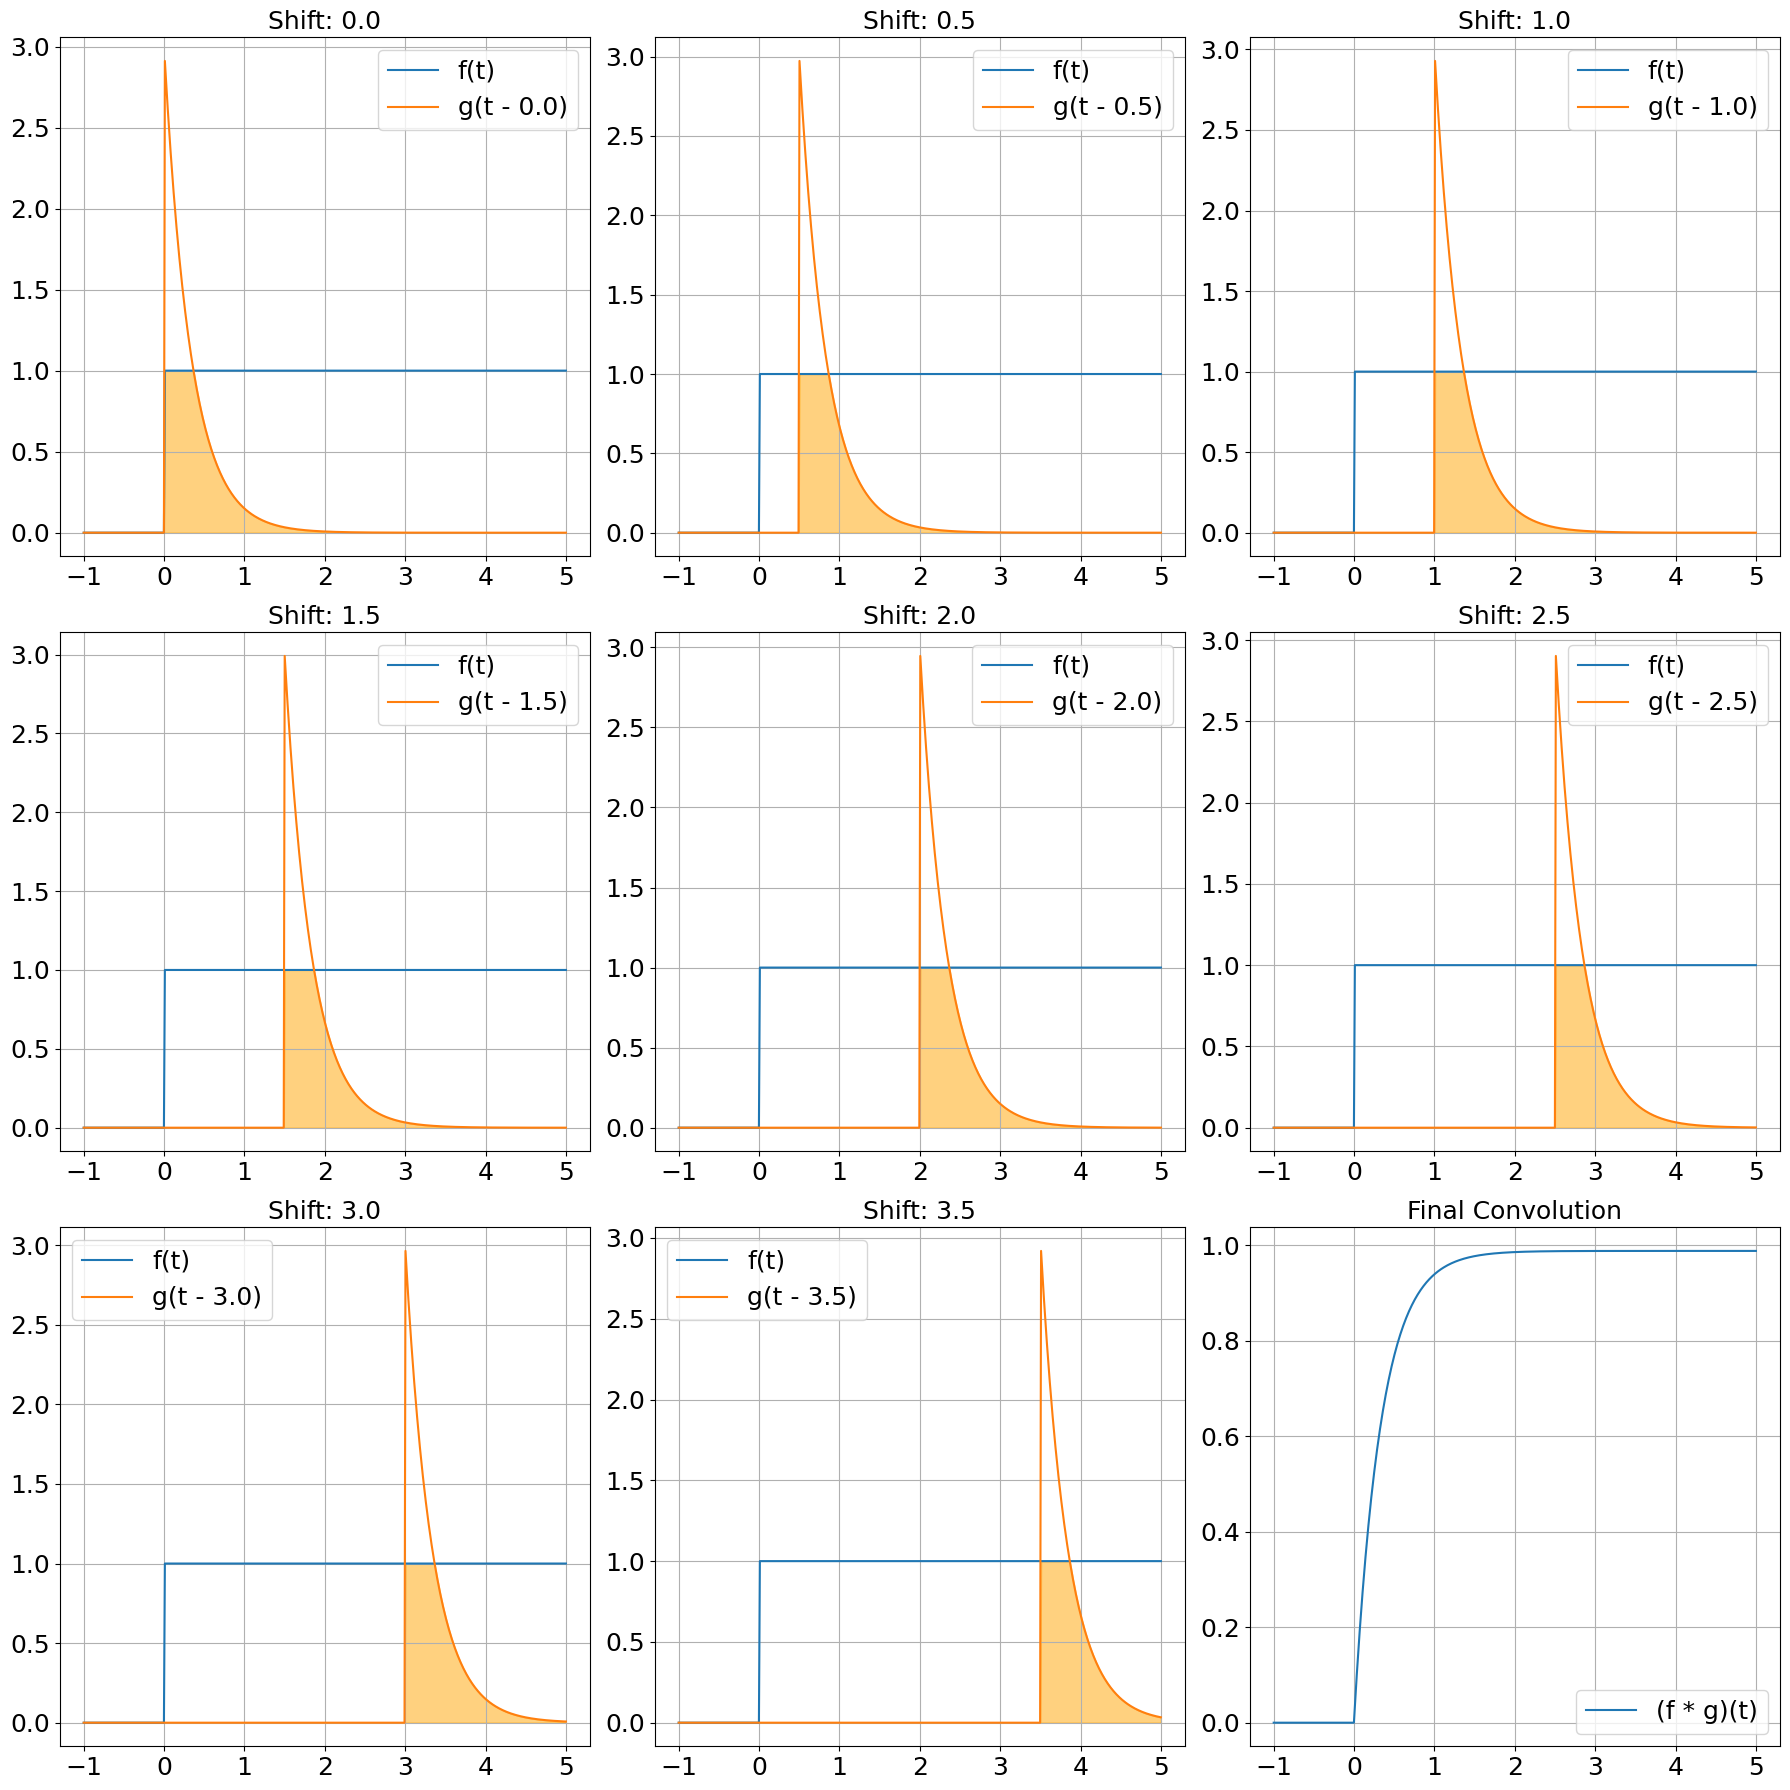

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions
def f(t):
    return np.where(t >= 0, 1, 0)  # Unit step function

def g(t):
    return 3 * np.exp(-3 * t) * (t >= 0)  # Exponential decay function

# Define the convolution function
def convolve(f, g, t):
    result = np.zeros_like(t)
    dt = t[1] - t[0]
    for i in range(len(t)):
        result[i] = np.sum(f(t[i] - t) * g(t) * dt)
    return result

# Time array
t = np.linspace(-1, 5, 500)

# Perform convolution
y = convolve(f, g, t)

# Plotting
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Font size
fontsize = 18

# Intermediate steps for visualization
shifts = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 0]
for i, (ax, shift) in enumerate(zip(axs.flat, shifts)):
    if i == 8:
        ax.plot(t, y, label='(f * g)(t)')
        ax.set_title('Final Convolution', fontsize=fontsize)
        ax.legend(fontsize=fontsize)
    else:
        ax.plot(t, f(t), label='f(t)')
        ax.plot(t, g(t - shift), label=f'g(t - {shift:.1f})')
        ax.fill_between(t, 0, np.minimum(f(t), g(t - shift)), color='orange', alpha=0.5)
        ax.set_title(f'Shift: {shift:.1f}', fontsize=fontsize)
        ax.legend(fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.grid(True)

plt.tight_layout()
plt.show()


### *Example 2*: Discrete Convolution

#### Step-by-Step

Consider the discrete signals:

$$ f[n] = \{1, 2, 1\} $$

$$ g[n] = \{1, 1, 1\} $$

The convolution $ (f * g)[n] $ is computed as follows:

1. Write down the definition:

$$ (f * g)[n] = \sum_{k=-\infty}^{\infty} f[k] g[n - k] $$

2. Expand the signals and calculate each step:

For $ n = 0 $:

$$ (f * g)[0] = f[0]g[0] = 1 \cdot 1 = 1 $$

For $ n = 1 $:

$$ (f * g)[1] = f[0]g[1] + f[1]g[0] = 1 \cdot 1 + 2 \cdot 1 = 3 $$

For $ n = 2 $:

$$ (f * g)[2] = f[0]g[2] + f[1]g[1] + f[2]g[0] = 1 \cdot 1 + 2 \cdot 1 + 1 \cdot 1 = 4 $$

For $ n = 3 $:

$$ (f * g)[3] = f[1]g[2] + f[2]g[1] = 2 \cdot 1 + 1 \cdot 1 = 3 $$

For $ n = 4 $:

$$ (f * g)[4] = f[2]g[2] = 1 \cdot 1 = 1 $$

So, the resulting convolution is:

$$ (f * g)[n] = \{1, 3, 4, 3, 1\} $$

### Graphical Illustration

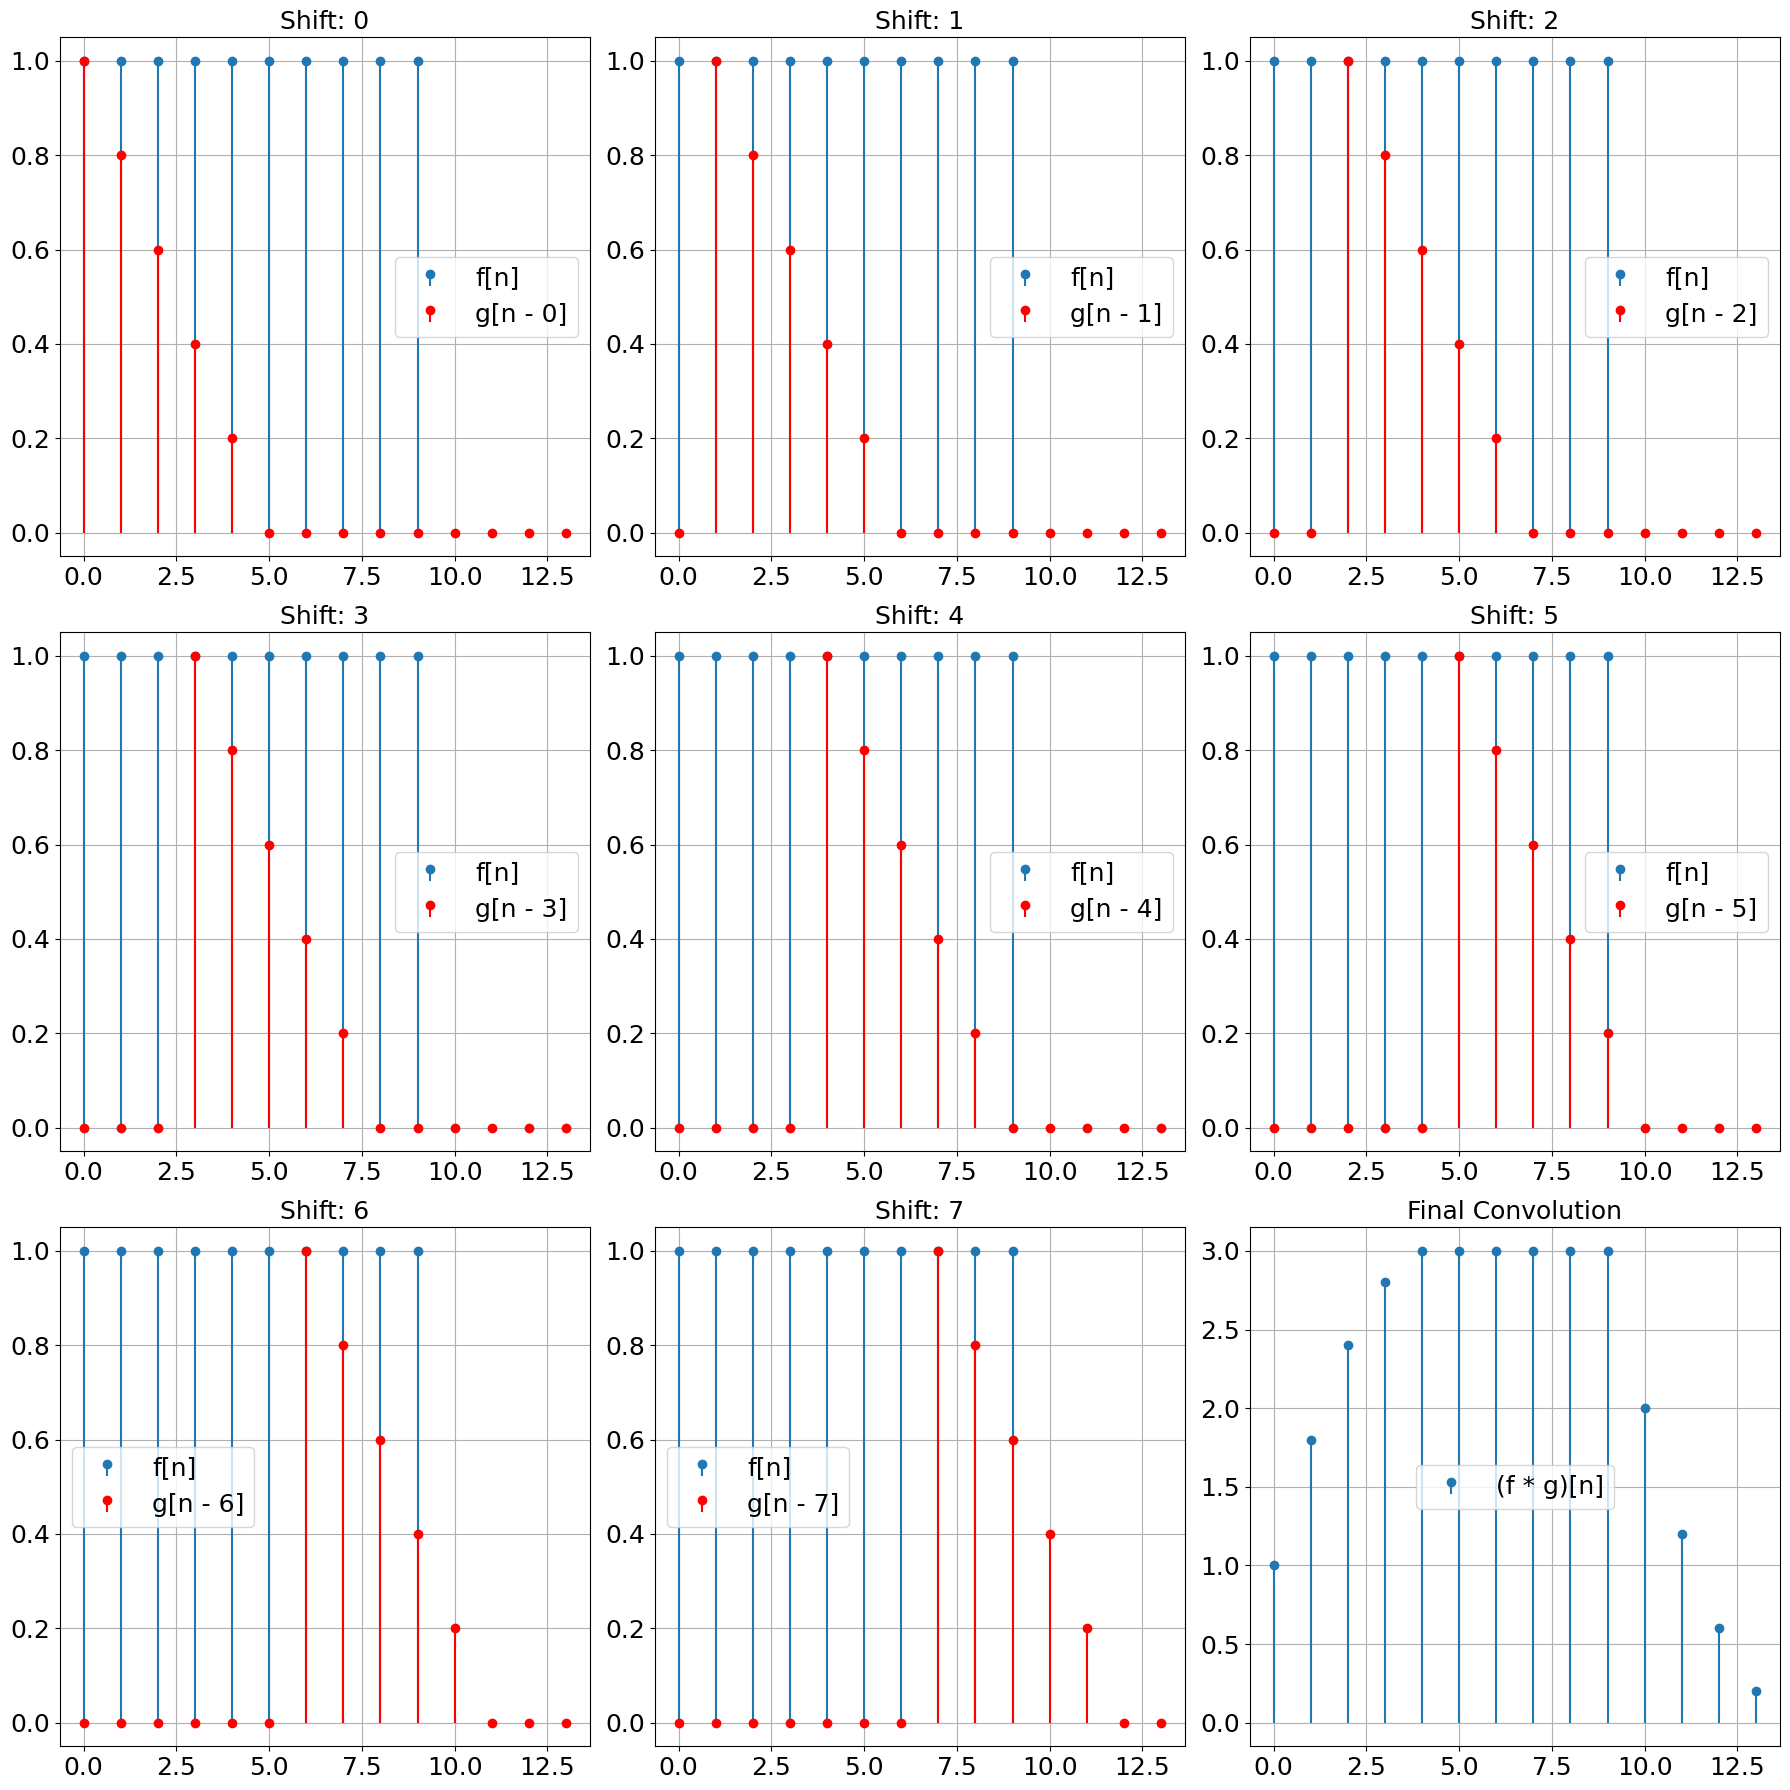

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sequences
f = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])  # Discrete unit step function
g = np.array([1, 0.8, 0.6, 0.4, 0.2])  # Discrete exponentially decaying function

# Perform convolution
conv_result = np.convolve(f, g)

# Plotting
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Font size
fontsize = 18

# Intermediate steps for visualization
shifts = [0, 1, 2, 3, 4, 5, 6, 7, 8]
for i, (ax, shift) in enumerate(zip(axs.flat, shifts)):
    if i == 8:
        ax.stem(np.arange(len(conv_result)), conv_result, label='(f * g)[n]', basefmt=" ")
        ax.set_title('Final Convolution', fontsize=fontsize)
        ax.legend(fontsize=fontsize)
    else:
        if 0 <= shift < len(f):
            ax.stem(np.arange(len(f)), f, label='f[n]', basefmt=" ")
        shifted_g = np.zeros(len(f) + len(g) - 1)
        if shift + len(g) <= len(shifted_g):
            shifted_g[shift:shift+len(g)] = g
        else:
            shifted_g[shift:] = g[:len(shifted_g) - shift]
        ax.stem(np.arange(len(shifted_g)), shifted_g, label=f'g[n - {shift}]', linefmt='r', markerfmt='ro', basefmt=" ")
        ax.set_title(f'Shift: {shift}', fontsize=fontsize)
        ax.legend(fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.grid(True)

plt.tight_layout()
plt.show()


### Example of Image Convolution

Image convolution is a key operation in image processing and computer vision. It is used for various tasks such as edge detection, blurring, sharpening, and feature extraction.

#### Explanation

In image convolution, a kernel (or filter) is applied to an image to produce a new image. The kernel is a small matrix that slides over the image and performs element-wise multiplication and summation to produce a new pixel value.

#### Example

Consider a simple 3x3 kernel for edge detection:

$$ K = \begin{bmatrix} -1 & -1 & -1 \\ -1 & 8 & -1 \\ -1 & -1 & -1 \end{bmatrix} $$

This kernel highlights edges in the image by subtracting the surrounding pixel values from the center pixel value.

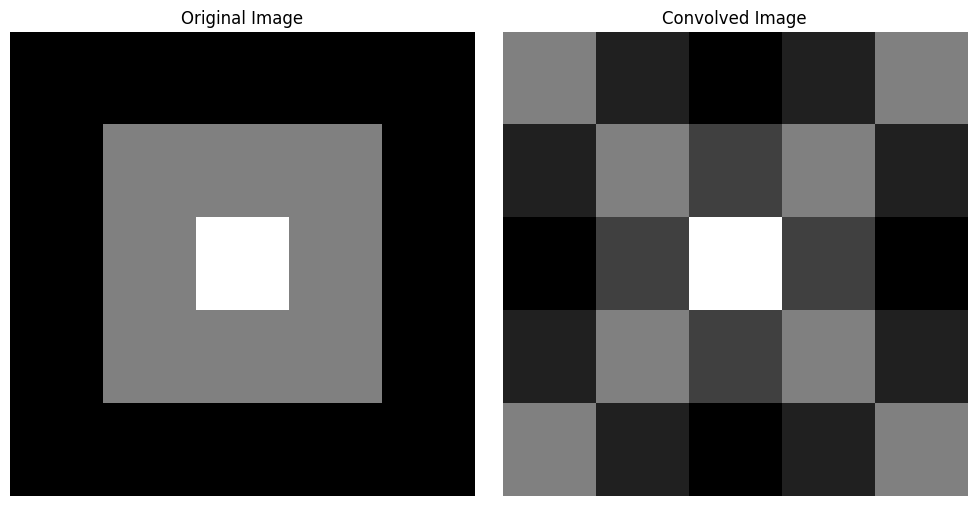

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Sample image (5x5 for simplicity)
image = np.array([[10, 10, 10, 10, 10],
                  [10, 20, 20, 20, 10],
                  [10, 20, 30, 20, 10],
                  [10, 20, 20, 20, 10],
                  [10, 10, 10, 10, 10]])

# Define the kernel
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

# Perform convolution
conv_image = convolve2d(image, kernel, mode='same')

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Convolved image
axs[1].imshow(conv_image, cmap='gray')
axs[1].set_title('Convolved Image')
axs[1].axis('off')

plt.tight_layout()
plt.show()


## Importance of Image Convolution

Image convolution is crucial in various applications:
- **Edge Detection**: Highlights edges in images, useful for object detection and recognition.
- **Blurring**: Reduces noise and detail, useful in preprocessing.
- **Sharpening**: Enhances details, useful for improving image quality.
- **Feature Extraction**: Extracts important features for machine learning and computer vision tasks.

In summary, convolution is a versatile tool in both signal processing and image processing, providing a mathematical framework for understanding and manipulating signals and images.